In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
#Data Collection
nifty_50 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50")[2].Symbol
nifty_50.head(10)

0      ADANIENT
1    ADANIPORTS
2    APOLLOHOSP
3    ASIANPAINT
4      AXISBANK
5    BAJAJ-AUTO
6    BAJFINANCE
7    BAJAJFINSV
8          BPCL
9    BHARTIARTL
Name: Symbol, dtype: object

In [3]:
nifty_50.describe()

count           50
unique          50
top       ADANIENT
freq             1
Name: Symbol, dtype: object

In [4]:
nifty_50 += ".NS"
nifty_50.to_list()
nifty = [i for i in nifty_50]
data = yf.download(nifty, start = "2012-01-01").stack()

[*********************100%%**********************]  50 of 50 completed


In [5]:
data.head(10)

Adj Close        Close         High          Low  \
Date                                                                           
2012-01-02 ADANIENT.NS      37.360775    44.242844    44.909592    43.376842   
           ADANIPORTS.NS   107.228630   114.699997   123.750000   111.000000   
           APOLLOHOSP.NS   525.642883   552.599976   573.150024   548.150024   
           ASIANPAINT.NS   235.916946   259.029999   261.795013   256.000000   
           AXISBANK.NS     148.065048   158.960007   163.000000   156.800003   
           BAJAJ-AUTO.NS  1032.468262  1475.500000  1600.000000  1442.000000   
           BAJAJFINSV.NS    40.790802    41.268360    42.545563    41.076778   
           BAJFINANCE.NS    55.175644    58.625214    59.460773    57.847946   
           BHARTIARTL.NS   297.790680   316.587891   320.352448   314.246552   
           BPCL.NS          45.257999    80.083336    81.166664    79.383331   

                                 Open     Volume  
Date                                              
2012-01-02 ADANIENT.NS      44.909592  4426427.0  
           ADANIPORTS.NS   122.800003  1572363.0  
           APOLLOHOSP.NS   558.500000   226540.0  
           ASIANPAINT.NS   256.000000   182450.0  
           AXISBANK.NS     162.000000  9727265.0  
           BAJAJ-AUTO.NS  1600.000000  1562234.0  
           BAJAJFINSV.NS    42.540649   186103.0  
           BAJFINANCE.NS    58.974979    44443.0  
           BHARTIARTL.NS   316.312439  2138824.0  
           BPCL.NS          80.816666  3349536.0

In [6]:
data.tail(10)

Adj Close         Close          High  \
Date                                                                 
2024-02-02 SUNPHARMA.NS    1416.650024   1416.650024   1433.849976   
           TATACONSUM.NS   1162.750000   1162.750000   1170.699951   
           TATAMOTORS.NS    878.750000    878.750000    895.750000   
           TATASTEEL.NS     138.699997    138.699997    139.600006   
           TCS.NS          3966.300049   3966.300049   3984.399902   
           TECHM.NS        1338.099976   1338.099976   1354.000000   
           TITAN.NS        3612.399902   3612.399902   3713.449951   
           ULTRACEMCO.NS  10098.549805  10098.549805  10165.900391   
           UPL.NS           533.650024    533.650024    540.650024   
           WIPRO.NS         483.149994    483.149994    486.500000   

                                  Low          Open      Volume  
Date                                                             
2024-02-02 SUNPHARMA.NS   1405.150024   1409.000000   1775327.0  
           TATACONSUM.NS  1132.000000   1132.000000   1741024.0  
           TATAMOTORS.NS   876.849976    886.000000  13000031.0  
           TATASTEEL.NS    134.800003    135.300003  69265966.0  
           TCS.NS         3872.000000   3875.050049   2824983.0  
           TECHM.NS       1323.050049   1323.500000   1838131.0  
           TITAN.NS       3602.449951   3635.000000   2320050.0  
           ULTRACEMCO.NS  9992.299805  10000.000000    334373.0  
           UPL.NS          529.250000    533.900024   4220029.0  
           WIPRO.NS        475.000000    475.000000   8144890.0

In [7]:
#Calculating Daily Returns
returns = data["Adj Close"].unstack().pct_change()
returns

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,-0.004504,0.048823,0.008234,0.023935,0.053787,0.012877,0.038448,0.015827,0.040168,-0.016129,...,0.008583,0.039582,0.054363,0.060833,0.016121,0.049047,0.025121,0.018761,0.031102,0.043860
2012-01-04,-0.032017,0.021197,0.019833,0.008540,0.012656,-0.046136,-0.041036,-0.012481,-0.034295,-0.004336,...,0.003604,0.008990,0.037381,0.005804,-0.020541,0.007417,-0.009746,-0.028708,0.008782,0.004202
2012-01-05,-0.039727,0.031339,0.005632,-0.001215,0.026528,0.030199,0.005379,0.002891,-0.005630,-0.022944,...,-0.002793,-0.024109,0.004473,-0.003710,-0.000853,-0.014974,-0.007593,0.007181,0.004921,-0.007890
2012-01-06,0.005429,0.007893,-0.000875,-0.004154,-0.019698,-0.008069,0.002972,-0.028087,-0.040215,0.036095,...,0.000200,0.004297,0.007422,0.002896,-0.002218,0.006047,-0.020119,0.000435,0.000377,-0.022171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,0.059113,0.043924,0.026083,0.009104,0.018230,-0.006410,0.004171,0.014981,0.001379,0.038470,...,0.023789,0.003783,0.035906,0.009346,-0.002441,-0.005824,0.025582,0.030564,0.004374,0.006383
2024-01-30,0.008631,-0.007772,-0.003152,-0.007376,-0.006737,0.002332,-0.028345,-0.052067,-0.003012,0.023445,...,-0.020773,-0.015906,0.021225,-0.002222,-0.000118,0.002663,-0.033854,-0.030217,-0.008153,-0.001057
2024-01-31,0.016467,0.017097,0.006839,0.001269,0.012949,0.013368,0.023105,0.006704,0.010400,-0.003669,...,0.034044,-0.004364,0.029516,0.009280,0.004052,0.011989,-0.010226,0.020449,0.004577,0.011958


In [8]:
#Calculating Monthly Returns
monthly_returns = (returns+1).resample("M").prod()
monthly_returns

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,1.440845,1.275065,1.086048,1.156352,1.352604,1.085259,1.069396,1.244034,1.060615,1.190739,...,1.107633,1.184717,1.325088,1.321607,0.963456,1.140059,1.159006,1.052643,1.162205,1.042357
2012-02-29,0.901058,1.018549,0.965842,1.058509,1.095530,1.125086,1.428874,1.053087,0.957615,1.157476,...,1.003464,1.165197,1.111590,1.048248,1.079079,0.921012,1.125123,1.157769,1.055894,1.044576
2012-03-31,0.813476,0.871174,1.102044,1.022536,0.973212,0.931839,0.952715,1.030171,0.964877,1.057380,...,1.035519,0.894862,1.015870,0.998307,0.956504,1.200250,1.000657,1.076898,0.834777,1.017925
2012-04-30,0.921601,0.986873,0.986772,1.087846,0.965756,0.967625,1.196566,1.073003,0.918911,0.957729,...,1.058163,1.040499,1.150045,0.982830,1.066563,0.973639,1.019471,0.940807,0.907659,0.920359
2012-05-31,0.927390,0.965962,1.062584,1.140283,0.877140,0.930407,0.896133,0.972076,0.974396,1.040259,...,0.940060,0.920445,0.736061,0.870592,0.998998,0.959814,0.955794,0.999263,0.952279,1.012221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,0.950599,0.951039,0.938134,0.947691,0.947092,1.049440,1.019023,0.959274,0.987047,1.007646,...,0.939542,1.026913,0.997540,0.921257,0.957169,0.926685,1.012973,1.020279,0.877079,0.940278
2023-11-30,1.027847,1.051927,1.147109,1.043277,1.094108,1.146122,1.066229,0.950518,1.109689,1.247530,...,1.126079,1.044697,1.123678,1.077053,1.035280,1.089099,1.094352,1.069031,1.055782,1.081849
2023-12-31,1.207924,1.240884,1.031679,1.090548,1.026111,1.116032,1.007350,1.028904,1.017246,1.083178,...,1.027410,1.155249,1.104119,1.091478,1.087682,1.042344,1.052956,1.166532,1.029090,1.141024


In [9]:
#Calculating Yearly Returns
yearly_returns = monthly_returns.rolling(12).apply(np.prod).dropna()
yearly_returns

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,0.974363,1.186740,1.434079,1.729185,1.733329,1.486612,2.194179,2.270716,0.923138,1.504314,...,1.496096,1.788210,1.730285,1.292731,1.080481,1.639099,1.636252,1.729268,1.045232,1.003556
2013-01-31,0.623161,1.037935,1.355927,1.518523,1.421852,1.302975,1.934732,1.794622,0.932139,1.455143,...,1.317233,1.409370,1.244602,0.924278,1.203053,1.540597,1.386947,1.573521,0.919384,1.009449
2013-02-28,0.596445,0.938486,1.435831,1.361617,1.159038,1.127176,1.287596,1.690432,0.925528,1.139247,...,1.466533,1.013969,1.080396,0.743673,1.258257,1.759962,1.151291,1.334452,0.757543,0.977761
2013-03-31,0.687476,1.077654,1.321786,1.532665,1.152444,1.103285,1.287030,1.470282,0.866683,1.094080,...,1.445891,1.157084,0.995465,0.682438,1.366420,1.478119,1.130690,1.239760,0.920018,1.008409
2013-04-30,0.804617,1.141589,1.332001,1.341279,1.369455,1.191426,1.034268,1.463521,1.030448,1.252915,...,1.586825,1.280789,0.964801,0.671944,1.120690,1.365895,1.170953,1.340253,1.218670,0.873101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,0.685834,0.959293,1.070350,0.970380,1.084826,1.539147,0.931082,1.057811,1.104087,1.163001,...,1.082361,1.182120,1.527824,1.207541,1.090001,1.141885,1.158785,1.259986,0.752360,0.990145
2023-11-30,0.602294,0.943303,1.173540,0.990869,1.193172,1.726965,1.029978,1.068773,1.201014,1.291395,...,1.184859,1.162646,1.612657,1.226887,1.062679,1.206942,1.319981,1.278056,0.734479,1.017615
2023-12-31,0.738754,1.260526,1.277991,1.111123,1.181713,1.999117,1.090269,1.124040,1.286368,1.443885,...,1.271614,1.432636,2.016705,1.279683,1.203451,1.333056,1.419580,1.516163,0.833471,1.202956


In [10]:
#Identifying top stocks
top_stocks = yearly_returns.loc["2012-12-31"].nlargest(5)
top_stocks

BAJFINANCE.NS    2.270716
BAJAJFINSV.NS    2.194179
EICHERMOT.NS     1.962085
INDUSINDBK.NS    1.853477
TATACONSUM.NS    1.788210
Name: 2012-12-31 00:00:00, dtype: float64

In [11]:
#Function to figure out portfolio returns
def top_perform(date):
    top_stocks = yearly_returns.loc[date].nlargest(5)
    portfolio_returns =  monthly_returns[top_stocks.name:][1:2][top_stocks.index].mean(axis=1)
    return portfolio_returns

In [12]:
#Illustration
top_perform("2012-12-31")

Date
2013-01-31    0.975032
Freq: M, dtype: float64

In [13]:
#Developing our portfolio
portfolio = pd.DataFrame()
for date in yearly_returns.index[:-1]:
    temp = top_perform(date).to_frame("Portfolio Returns")
    portfolio = pd.concat([portfolio, temp])
portfolio

,Portfolio Returns
Date,
2013-01-31,0.975032
2013-02-28,0.991717
2013-03-31,0.991094
2013-04-30,0.998198
2013-05-31,1.090375
...,...
2023-10-31,0.992280
2023-11-30,1.109729
2023-12-31,1.128783


<AxesSubplot:xlabel='Date'>

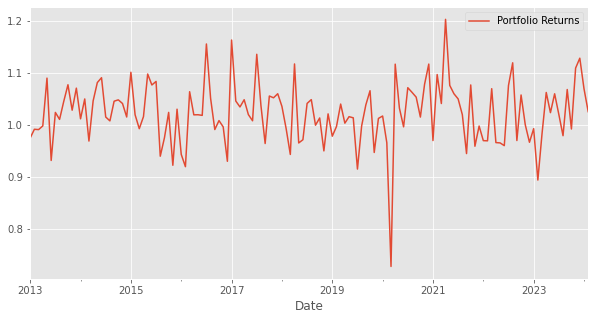

In [14]:
#Plot illustrating returns generated by our portfolio everyday
portfolio.plot(figsize=(10,5))

In [15]:
#Calculating cumulative returns generated by our portfolio
portfolio_cumulative_returns = np.exp(np.log1p(portfolio).cumsum())
portfolio_cumulative_returns.head(40)

,Portfolio Returns
Date,
2013-01-31,1.975032e+00
2013-02-28,3.933706e+00
2013-03-31,7.832379e+00
2013-04-30,1.565064e+01
2013-05-31,3.271571e+01
2013-06-30,6.319456e+01
2013-07-31,1.279199e+02
2013-08-31,2.572190e+02
2013-09-30,5.261654e+02


Text(0, 0.5, 'Cumulative Returns')

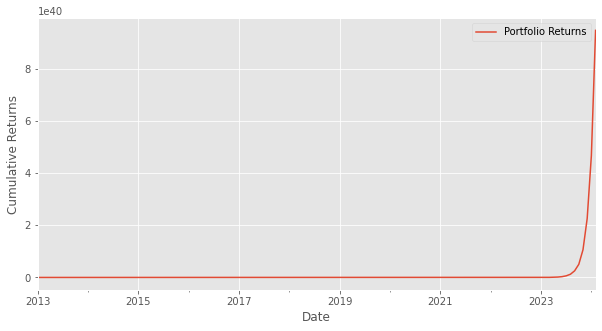

In [16]:
#Plot illustrating growth of returns
portfolio_cumulative_returns.plot(figsize=(10,5))
plt.ylabel("Cumulative Returns")

In [17]:
#Calculating returns generated by Nifty index
nifty_index = yf.download("^NSEI")
nifty_index["Index Returns"] = nifty_index["Adj Close"].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [18]:
#Comparing our returns to Nifty index's returns
comparison = portfolio.merge(nifty_index["Index Returns"], left_index=True, right_index=True).dropna()
comparison

,Portfolio Returns,Index Returns
Date,,
2013-01-31,0.975032,-0.003468
2013-02-28,0.991717,-0.017915
2013-04-30,0.998198,0.004421
2013-05-31,1.090375,-0.022550
2013-07-31,1.024223,-0.002268
...,...,...
2023-07-31,1.020321,0.005485
2023-08-31,0.979329,-0.004840
2023-10-31,0.992280,-0.003203


Text(0.5, 1.0, 'Comparison of Cumulative Returns')

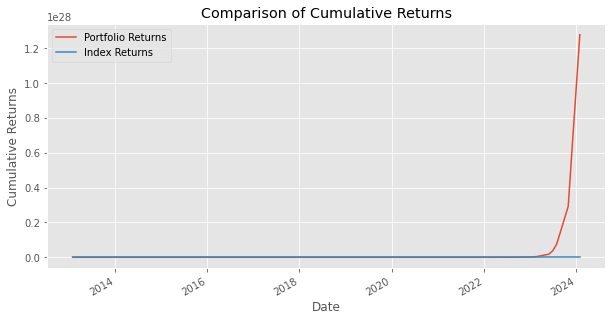

In [19]:
#Plot illustrating superior performance of our strategy
portfolio_cumulative_returns = np.exp(np.log1p(comparison).cumsum())
portfolio_cumulative_returns.plot(figsize=(10,5))
plt.ylabel("Cumulative Returns")
plt.title("Comparison of Cumulative Returns")

In [20]:
risk_free_rate = 0.1/252
comparison["Excess Returns"] = comparison["Portfolio Returns"] - risk_free_rate
comparison

,Portfolio Returns,Index Returns,Excess Returns
Date,,,
2013-01-31,0.975032,-0.003468,0.974636
2013-02-28,0.991717,-0.017915,0.991320
2013-04-30,0.998198,0.004421,0.997801
2013-05-31,1.090375,-0.022550,1.089978
2013-07-31,1.024223,-0.002268,1.023827
...,...,...,...
2023-07-31,1.020321,0.005485,1.019924
2023-08-31,0.979329,-0.004840,0.978932
2023-10-31,0.992280,-0.003203,0.991883


In [21]:
#Calculating Sharpe Ratio
sharpe_ratio = np.sqrt(252)*comparison["Excess Returns"].mean()/comparison["Excess Returns"].std()
print("Sharpe Ratio : ",sharpe_ratio)

Sharpe Ratio :  261.24664474859713


In [22]:
portfolio_cumulative_returns.tail(20)

,Portfolio Returns,Index Returns
Date,,
2021-11-30,2.345748e+22,1.080546
2021-12-31,4.686730e+22,1.089974
2022-01-31,9.232085e+22,1.105136
2022-02-28,1.818215e+23,1.114125
2022-03-31,3.763687e+23,1.111992
2022-05-31,7.397374e+23,1.106863
2022-06-30,1.449999e+24,1.105543
2022-09-30,2.856555e+24,1.123702
2022-10-31,5.878340e+24,1.137942


In [23]:
#Calculating Cumulative Returns Generated
print("Cumulative returns generated in percentage : ", portfolio_cumulative_returns["Portfolio Returns"].iloc[-1])

Cumulative returns generated in percentage :  1.2769971282309658e+28
